# Doodles

Exploring the Ordnance Survey *OpenNames* dataset.

In [ ]:
# Data downloaded from:
# https://osdatahub.os.uk/downloads/open/OpenNames
# Your use of OS OpenData is subject to the terms at http://os.uk/opendata/licence.
#
# The copyright acknowledgements to use for the attribution statement are:
#
# Contains OS data © Crown Copyright and database rights 2025.
#
# Contains Royal Mail data © Royal Mail copyright and database right 2025.
#
# Contains National Statistics data © Crown copyright and database right 2025

# Quick extract:
# grep "Isle of Wight" opname_csv_gb/Data/*.csv > IW_os_placenames.csv
# Includes false positives

# Better:
# grep "http://data.ordnancesurvey.co.uk/id/7000000000025469" opname_csv_gb/Data/*.csv > IW_os_placenames.csv

In [ ]:
# Load in data
import pandas as pd

df = pd.read_csv("IW_os_placenames.csv")

# Preview
df.head()

,ID,NAMES_URI,NAME1,NAME1_LANG,NAME2,NAME2_LANG,TYPE,LOCAL_TYPE,GEOMETRY_X,GEOMETRY_Y,...,COUNTY_UNITARY,COUNTY_UNITARY_URI,COUNTY_UNITARY_TYPE,REGION,REGION_URI,COUNTRY,COUNTRY_URI,RELATED_SPATIAL_OBJECT,SAME_AS_DBPEDIA,SAME_AS_GEONAMES
0,SU22.csv:osgb4000000074770417,http://data.ordnancesurvey.co.uk/id/4000000074...,Isle of Wight Hill,NaN,NaN,NaN,landform,Hill Or Mountain,424844,137337,...,Hampshire,http://data.ordnancesurvey.co.uk/id/7000000000...,http://data.ordnancesurvey.co.uk/ontology/admi...,South East,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,NaN,NaN,NaN
1,SU86.csv:osgb4000000074808919,http://data.ordnancesurvey.co.uk/id/4000000074...,Isle of Wight Pond,NaN,NaN,NaN,hydrography,Inland Water,495262,172358,...,Windsor and Maidenhead,http://data.ordnancesurvey.co.uk/id/7000000000...,http://data.ordnancesurvey.co.uk/ontology/admi...,South East,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,NaN,NaN,NaN
2,SZ06.csv:osgb4000000026226540,http://data.ordnancesurvey.co.uk/id/4000000026...,Isle of Wight Road,NaN,NaN,NaN,transportNetwork,Named Road,403311,77620,...,Dorset,http://data.ordnancesurvey.co.uk/id/7000000000...,http://data.ordnancesurvey.co.uk/ontology/admi...,South West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,NaN,NaN,NaN
3,SZ28.csv:osgb4000000074551734,http://data.ordnancesurvey.co.uk/id/4000000074...,Bouldnor,NaN,NaN,NaN,populatedPlace,Village,436404,89600,...,Isle of Wight,http://data.ordnancesurvey.co.uk/id/7000000000...,http://data.ordnancesurvey.co.uk/ontology/admi...,South East,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,NaN,http://dbpedia.org/resource/Bouldnor,NaN
4,SZ28.csv:osgb4000000074551705,http://data.ordnancesurvey.co.uk/id/4000000074...,Freshwater,NaN,NaN,NaN,populatedPlace,Village,433576,87130,...,Isle of Wight,http://data.ordnancesurvey.co.uk/id/7000000000...,http://data.ordnancesurvey.co.uk/ontology/admi...,South East,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,NaN,"http://dbpedia.org/resource/Freshwater,_Isle_o...",http://sws.geonames.org/2649069


In [ ]:
# Cleaning step - filter to IW locations
#
# # Use: COUNTY_UNITARY_URI
# http://data.ordnancesurvey.co.uk/id/7000000000025469
df = df[
    df["COUNTY_UNITARY_URI"] == "http://data.ordnancesurvey.co.uk/id/7000000000025469"
]

In [4]:
# What types of record are there?
df["TYPE"].unique(), df["LOCAL_TYPE"].unique()

(array(['populatedPlace', 'other', 'transportNetwork', 'landcover',
        'landform', 'hydrography'], dtype=object),
 array(['Village', 'Suburban Area', 'Hamlet', 'Town', 'Postcode',
        'Named Road', 'Section Of Named Road', 'Numbered Road',
        'Woodland Or Forest', 'Hill Or Mountain', 'Other Landcover',
        'Valley', 'Coastal Headland', 'Other Coastal Landform', 'Wetland',
        'Island', 'Cliff Or Slope', 'Bay', 'Harbour',
        'Medical Care Accommodation', 'Electricity Production',
        'Primary Education', 'Vehicular Ferry Terminal',
        'Section Of Numbered Road', 'Spot Height', 'Tidal Water',
        'Secondary Education', 'Special Needs Education',
        'Other Settlement', 'Inland Water', 'Other Landform', 'Channel',
        'Beach', 'Estuary', 'Sea', 'Railway', 'Passenger Ferry Terminal',
        'Non State Primary Education,Non State Secondary Education',
        'Railway Station', 'Bus Station', 'Airport', 'Further Education',
        'Hospice',

In [ ]:
df.groupby("TYPE")["LOCAL_TYPE"].value_counts()

TYPE              LOCAL_TYPE                                               
hydrography       Bay                                                            31
                  Inland Water                                                    8
                  Tidal Water                                                     8
                  Estuary                                                         4
                  Channel                                                         3
                  Sea                                                             2
landcover         Woodland Or Forest                                            340
                  Other Landcover                                                69
                  Wetland                                                        20
                  Beach                                                          14
landform          Other Coastal Landform                                         45


In [ ]:
road_names = (
    df[df["LOCAL_TYPE"].isin(["Named Road", "Section Of Named Road"])]["NAME1"]
    .unique()
    .tolist()
)
road_names.sort()
len(road_names), road_names[:5]

(2033,
 ['Abbey Lane', 'Abbey Walk', 'Abbots Close', 'Abingdon Road', 'Acacia Close'])

In [ ]:
settlement_names = df[df["TYPE"] == "populatedPlace"]["NAME1"].unique()
settlement_names

array(['Bouldnor', 'Freshwater', 'Cranmore', 'School Green',
       'Thorley Street', 'Afton', 'Thorley', 'Wellow', 'Dunsbury',
       'Hulverstone', 'Norton', 'New Village', 'Shalcombe', 'Middleton',
       'Pound Green', 'Hamstead', 'Totland', 'Brook', 'Locksley',
       'Brookgreen', 'Colwell', 'Freshwater Bay', 'Norton Green',
       'Easton', 'Yarmouth', 'The Orchard', 'Pyle', 'Bonchurch',
       'Ventnor', 'Chale', 'Niton', 'Blackgang', 'Nettlecombe',
       'Atherfield Green', 'Lowtherville', 'Whitwell', 'St Lawrence',
       'Upper Bonchurch', 'Luccombe Village', 'Chale Green', 'Wroxall',
       'Bierley', 'Steephill', 'Cowlease', 'Southford', 'Weeks',
       'Bowcombe', 'Little Whitehouse', 'Plaish', 'Fairlee', 'Littletown',
       'Rew Street', 'Roslin', "Mark's Corner", 'Alverstone',
       'Porchfield', 'Marsh Green', 'Hunny Hill', 'Wootton Common',
       'Gurnard', 'Whiteley Bank', 'Winford', 'Ningwood', 'East Cowes',
       'Branstone', 'Northwood', 'Carisbrooke', 'Shorw

In [ ]:
# Road names related to populated place - quick hack
road_names_place_first = []
for r in road_names:
    road_names_place_first.extend(
        [
            (r, s)
            for s in settlement_names
            if s.split()[0] == r.split()[0]
            and r.split()[0]
            not in [
                "St",
                "The",
                "Upper",
                "Little",
                "Lower",
                "Upper",
                "North",
                "South",
                "East",
                "West",
                "Old",
            ]
        ]
    )

road_names_place_first = list(set(road_names_place_first))
road_names_place_first.sort()
road_names_place_first[:10]  # preview first 10

[('Afton Road', 'Afton'),
 ('Alverstone Road', 'Alverstone'),
 ('Alverstone Road', 'Alverstone Garden Village'),
 ('Alverstone Shute', 'Alverstone'),
 ('Alverstone Shute', 'Alverstone Garden Village'),
 ('Appley Lane', 'Appley'),
 ('Appley Rise', 'Appley'),
 ('Appley Road', 'Appley'),
 ('Appley Steps', 'Appley'),
 ('Appley Walk', 'Appley')]

In [23]:
import itertools

road_names_place_first_dict = {}
for road, area in road_names_place_first:
    if area not in road_names_place_first_dict:
        road_names_place_first_dict[area] = []
    road_names_place_first_dict[area].append(road)

dict(itertools.islice(road_names_place_first_dict.items(), 5))

{'Afton': ['Afton Road'],
 'Alverstone': ['Alverstone Road', 'Alverstone Shute'],
 'Alverstone Garden Village': ['Alverstone Road', 'Alverstone Shute'],
 'Appley': ['Appley Lane',
  'Appley Rise',
  'Appley Road',
  'Appley Steps',
  'Appley Walk'],
 'Apse Heath': ['Apse Manor Road']}

## Heritage England

Listed buildings: https://historicengland.org.uk/listing/the-list/data-downloads/#Listed

Skipping field alternative_names: unsupported OGR type: 5
Skipping field predecessor: unsupported OGR type: 5


<Axes: >

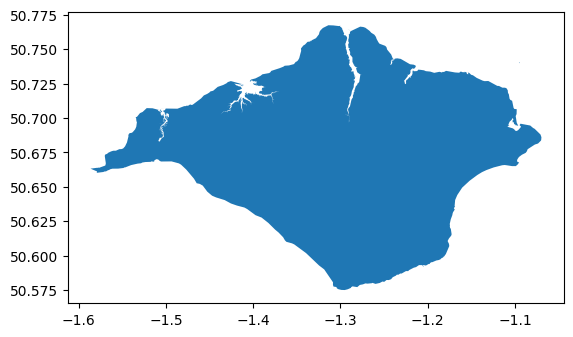

In [49]:
# E06000046
# https://findthatpostcode.uk/areas/E06000046.

import geopandas as gpd

boundary_gdf = gpd.read_file("https://findthatpostcode.uk/areas/E06000046.geojson")
boundary_gdf.plot()

In [51]:
gdf = gpd.read_file("National_Heritage_List_for_England_NHLE_IW_ish.gpkg")

gdf

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Non-conformant content for record 1 in column ListDate, 1987-11-05T00:00:00.0Z, successfully parsed
  return ogr_read(


,ListEntry,Name,Grade,ListDate,AmendDate,CaptureScale,hyperlink,NGR,Easting,Northing,geometry
0,1021466,20 and 20A Whitbourne Springs,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST8338544428,383389.0,144430.0,MULTIPOINT ((383388.771 144429.457))
1,1021467,TENNIS CORNER FARMHOUSE WITH GRANARY AND STABLE,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 82839 50851,382839.0,150851.0,MULTIPOINT ((382839 150851))
2,1021468,CHALCOT HOUSE,II*,1968-09-11 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 84294 48824,384294.0,148824.0,MULTIPOINT ((384294 148824))
3,1021469,FIVE LORDS FARMHOUSE,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 82772 50187,382772.0,150187.0,MULTIPOINT ((382772 150187))
4,1021470,PENLEIGH MILL,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 85722 50467,385722.0,150467.0,MULTIPOINT ((385722 150467))
...,...,...,...,...,...,...,...,...,...,...,...
379584,1493201,Barn at Well Farm,II,2025-04-22 11:34:29+00:00,NaT,1:1250,https://historicengland.org.uk/listing/the-lis...,SP9908815214,499088.0,215214.0,MULTIPOINT ((499088.654 215214.056))
379585,1493216,The Homestead,II,2003-11-06 00:00:00+00:00,NaT,1:1250,https://historicengland.org.uk/listing/the-lis...,SX4577482576,245774.0,82576.0,MULTIPOINT ((245773.658 82575.781))
379586,1493231,K8 telephone kiosk,II,2025-04-10 14:43:52+00:00,NaT,1:1250,https://historicengland.org.uk/listing/the-lis...,SZ0858099275,408580.0,99275.0,MULTIPOINT ((408579.61 99274.914))
379587,1493361,Congreve House,II,2025-04-11 14:33:59+00:00,NaT,1:1250,https://historicengland.org.uk/listing/the-lis...,SJ9562921022,395637.0,321022.0,MULTIPOINT ((395629.461 321021.991))


In [53]:
gdf.iloc[0].to_dict()

{'ListEntry': 1021466,
 'Name': '20 and 20A Whitbourne Springs',
 'Grade': 'II',
 'ListDate': Timestamp('1987-11-05 00:00:00+0000', tz='UTC'),
 'AmendDate': NaT,
 'CaptureScale': '1:2500',
 'hyperlink': 'https://historicengland.org.uk/listing/the-list/list-entry/1021466',
 'NGR': 'ST8338544428',
 'Easting': 383389.0,
 'Northing': 144430.0,
 'geometry': <MULTIPOINT ((383388.771 144429.457))>}

In [54]:
gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [55]:
# First, set the CRS to OSGB36 / British National Grid (EPSG:27700)
#gdf = gdf.set_crs("EPSG:27700")

# Convert to WGS84 (lat/long) - EPSG:4326
gdf_latlong = gdf.to_crs("EPSG:4326")
gdf_latlong.head()

,ListEntry,Name,Grade,ListDate,AmendDate,CaptureScale,hyperlink,NGR,Easting,Northing,geometry
0,1021466,20 and 20A Whitbourne Springs,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST8338544428,383389.0,144430.0,MULTIPOINT ((-2.23912 51.19884))
1,1021467,TENNIS CORNER FARMHOUSE WITH GRANARY AND STABLE,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 82839 50851,382839.0,150851.0,MULTIPOINT ((-2.2473 51.25656))
2,1021468,CHALCOT HOUSE,II*,1968-09-11 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 84294 48824,384294.0,148824.0,MULTIPOINT ((-2.22636 51.23838))
3,1021469,FIVE LORDS FARMHOUSE,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 82772 50187,382772.0,150187.0,MULTIPOINT ((-2.24823 51.25059))
4,1021470,PENLEIGH MILL,II,1987-11-05 00:00:00+00:00,NaT,1:2500,https://historicengland.org.uk/listing/the-lis...,ST 85722 50467,385722.0,150467.0,MULTIPOINT ((-2.20597 51.25319))


In [56]:
iw_points = gpd.sjoin(gdf_latlong, boundary_gdf, how="inner", predicate="within")
len(iw_points)

1971

In [57]:
def extract_first_point(geom):
    if geom.geom_type == "MultiPoint":
        return geom.geoms[0]  # Get first point
    elif geom.geom_type == "Point":
        return geom  # Already a point
    else:
        return None


iw_points["geometry"] = iw_points.geometry.apply(extract_first_point)

In [59]:
import folium

# Notebook 15.6 shows how to add a circle marker
# ALt. function to add marker eg from notebook 26.3


def add_marker(row, m):
    """Add marker to map."""
    point = row["geometry"]
    lat = point.y
    lng = point.x
    folium.Marker(
        location=[lat,lng],
        popup=f'{row["Name"]} ({row["ListEntry"]}) {row["Grade"]}',
    ).add_to(m)


m = folium.Map()

iw_points.apply(add_marker, m=m, axis=1)

# auto zoom in...
m.fit_bounds(m.get_bounds())

m

In [61]:
iw_points["hyperlink"].iloc[0]

'https://historicengland.org.uk/listing/the-list/list-entry/1031907'

In [ ]:
# Claude
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from urllib.parse import urljoin
import json


def extract_description(url, delay=1):
    """
    Extract the description text from a Historic England listing page

    Args:
        url (str): The Historic England listing URL
        delay (float): Delay between requests in seconds

    Returns:
        str: The description text, or None if not found
    """
    try:
        # Add delay to be respectful to the server
        time.sleep(delay)

        # Make request with proper headers
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }

        response = requests.get(url, headers=headers)
        response.raise_for_status()

        # Parse HTML
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the div with class "he-grid-col-lg-8" that contains h3 "Details"
        target_divs = soup.find_all("div", class_="he-grid-col-lg-8")

        for div in target_divs:
            h3 = div.find("h3")
            if h3 and h3.get_text(strip=True) == "Details":
                # Find the p tag after the h3
                p_tag = div.find("p")
                if p_tag:
                    # Get text and clean up extra whitespace/line breaks
                    description = p_tag.get_text(strip=True)
                    # Replace multiple spaces/newlines with single spaces
                    description = " ".join(description.split())
                    return description

        print(f"No description found for {url}")
        return None

    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None
    except Exception as e:
        print(f"Error parsing {url}: {e}")
        return None


import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from urllib.parse import urljoin
import json


def extract_description(url, delay=1):
    """
    Extract the description text from a Historic England listing page

    Args:
        url (str): The Historic England listing URL
        delay (float): Delay between requests in seconds

    Returns:
        str: The description text, or None if not found
    """
    try:
        # Add delay to be respectful to the server
        time.sleep(delay)

        # Make request with proper headers
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }

        response = requests.get(url, headers=headers)
        response.raise_for_status()

        # Parse HTML
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the div with class "he-grid-col-lg-8" that contains h3 "Details"
        target_divs = soup.find_all("div", class_="he-grid-col-lg-8")

        for div in target_divs:
            h3 = div.find("h3")
            if h3 and h3.get_text(strip=True) == "Details":
                # Find the p tag after the h3
                p_tag = div.find("p")
                if p_tag:
                    # Get text and clean up extra whitespace/line breaks
                    description = p_tag.get_text(strip=True)
                    # Replace multiple spaces/newlines with single spaces
                    description = " ".join(description.split())
                    return description

        print(f"No description found for {url}")
        return None

    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None
    except Exception as e:
        print(f"Error parsing {url}: {e}")
        return None


def process_dataframe(df, url_column="hyperlink", delay=1):
    """
    Process a pandas DataFrame with Historic England URLs and add descriptions

    Args:
        df (pd.DataFrame): DataFrame containing Historic England data
        url_column (str): Name of column containing URLs
        delay (float): Delay between requests in seconds

    Returns:
        pd.DataFrame: DataFrame with added 'Description' column
    """
    # Reset index to ensure we have clean 0-based indexing
    df_work = df.reset_index(drop=True).copy()
    descriptions = []

    for idx in range(len(df_work)):
        row = df_work.iloc[idx]
        url = row[url_column]
        print(
            f"Processing {idx+1}/{len(df_work)}: {row.get('Name', 'Unknown')} - {url}"
        )

        description = extract_description(url, delay)
        descriptions.append(description)

        # Save progress every 10 records
        if (idx + 1) % 10 == 0:
            temp_df = df_work.iloc[
                : idx + 1
            ].copy()  # Only take the rows we've processed so far
            temp_df["Description"] = descriptions  # This should now match in length
            temp_df.to_csv(f"he_listings_progress_{idx+1}.csv", index=False)
            print(f"Progress saved at record {idx+1}")

    # Always add descriptions to dataframe at the end
    print(f"Adding {len(descriptions)} descriptions to {len(df_work)} rows")
    df_work["Description"] = descriptions

    return df_work


iw_listed = process_dataframe(iw_points, delay=0.1)

In [ ]:
# There is a dupe colnam if colnames are decased ("Name" and "name")
iw_listed.rename(columns={"name": "boundary_name"}, inplace=True)
iw_listed.columns

In [ ]:
iw_listed.to_csv("iw_listed_desc_full_test.csv")
iw_listed.dropna().to_file("iw_listed.gpkg", driver="GPKG")

In [ ]:
# https://openplaques.org/pages/data
open_plaque = pd.read_csv("open-plaques-United-Kingdom-2023-11-10.csv")
open_plaque.head()

,id,machine_tag,title,inscription,latitude,longitude,country,area,address,erected,...,lead_subject_sex,lead_subject_born_in,lead_subject_died_in,lead_subject_type,lead_subject_roles,lead_subject_primary_role,lead_subject_wikipedia,lead_subject_dbpedia,lead_subject_image,subjects
0,9324,openplaques:id=9324,"Charles Dickens, Myles Birket Foster, and Will...",While staying in this house Charles Dickens (E...,50.59723,-1.18632,United Kingdom,"Ventnor, Isle of Wight","Shore Road, Bonchurch",NaN,...,male,1812.0,1870.0,man,"[""novelist"", ""journalist"", ""policeman"", ""son o...",novelist,https://en.wikipedia.org/wiki/Charles_Dickens,http://dbpedia.org/resource/Charles_Dickens,https://commons.wikimedia.org/wiki/Special:Fil...,"[""Charles Dickens|(1812-1870)|man|novelist, jo..."
1,8973,openplaques:id=8973,Henry Maudslay and Maudslay Rope-forming Machi...,Maudslay Rope-forming Machine Designed and man...,51.39432,0.52742,United Kingdom,Chatham,"Chatham Historical Dockyard, The Old Surgery, ...",1986.0,...,male,1771.0,1831.0,man,"[""inventor""]",inventor,https://en.wikipedia.org/wiki/Henry_Maudslay,http://dbpedia.org/resource/Henry_Maudslay,https://commons.wikimedia.org/wiki/Special:Fil...,"[""Henry Maudslay|(1771-1831)|man|inventor"", ""M..."
2,9850,openplaques:id=9850,Kew Bridge Pumping Station grey plaque,Kew Bridge Pumping Station Unique in its appro...,51.48904,-0.29049,United Kingdom,London,"Kew Bridge Steam Museum, Green Dragon Lane, Br...",1997.0,...,object,NaN,NaN,place,"[""pumping station""]",pumping station,NaN,NaN,NaN,"[""Kew Bridge Pumping Station||place|pumping st..."
3,50075,openplaques:id=50075,Blue plaque № 50075,"Meg & Wes August 11, 2018 romped in this disab...",51.56951,0.70367,United Kingdom,Southend-on-Sea,Southend Airport,2018.0,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,[]
4,49077,openplaques:id=49077,Clayton Hospital blue plaque,Clayton Hospital The Wakefield dispensary mov...,NaN,NaN,United Kingdom,Wakefield,Cross Street,NaN,...,object,NaN,NaN,place,"[""hospital""]",hospital,NaN,NaN,NaN,"[""Clayton Hospital||place|hospital""]"


In [99]:
from shapely.geometry import Point
# open_plaque = open_plaque.dropna(subset=["latitude", "longitude"])

# Create a geometry column from latitude and longitude
geometry = [Point(xy) for xy in zip(open_plaque["longitude"], open_plaque["latitude"])]

gdf_plaques = gpd.GeoDataFrame(open_plaque, geometry=geometry)
gdf_plaques.set_crs(epsg=4326, inplace=True)
gdf_plaques_iw = gpd.sjoin(
    gdf_plaques,
    boundary_gdf,
    how="inner",
    predicate="within",
)
gdf_plaques_iw.to_file("iw_plaques.gpkg", driver="GPKG")
gdf_plaques.head()

,id,machine_tag,title,inscription,latitude,longitude,country,area,address,erected,...,lead_subject_born_in,lead_subject_died_in,lead_subject_type,lead_subject_roles,lead_subject_primary_role,lead_subject_wikipedia,lead_subject_dbpedia,lead_subject_image,subjects,geometry
0,9324,openplaques:id=9324,"Charles Dickens, Myles Birket Foster, and Will...",While staying in this house Charles Dickens (E...,50.59723,-1.18632,United Kingdom,"Ventnor, Isle of Wight","Shore Road, Bonchurch",NaN,...,1812.0,1870.0,man,"[""novelist"", ""journalist"", ""policeman"", ""son o...",novelist,https://en.wikipedia.org/wiki/Charles_Dickens,http://dbpedia.org/resource/Charles_Dickens,https://commons.wikimedia.org/wiki/Special:Fil...,"[""Charles Dickens|(1812-1870)|man|novelist, jo...",POINT (-1.18632 50.59723)
1,8973,openplaques:id=8973,Henry Maudslay and Maudslay Rope-forming Machi...,Maudslay Rope-forming Machine Designed and man...,51.39432,0.52742,United Kingdom,Chatham,"Chatham Historical Dockyard, The Old Surgery, ...",1986.0,...,1771.0,1831.0,man,"[""inventor""]",inventor,https://en.wikipedia.org/wiki/Henry_Maudslay,http://dbpedia.org/resource/Henry_Maudslay,https://commons.wikimedia.org/wiki/Special:Fil...,"[""Henry Maudslay|(1771-1831)|man|inventor"", ""M...",POINT (0.52742 51.39432)
2,9850,openplaques:id=9850,Kew Bridge Pumping Station grey plaque,Kew Bridge Pumping Station Unique in its appro...,51.48904,-0.29049,United Kingdom,London,"Kew Bridge Steam Museum, Green Dragon Lane, Br...",1997.0,...,NaN,NaN,place,"[""pumping station""]",pumping station,NaN,NaN,NaN,"[""Kew Bridge Pumping Station||place|pumping st...",POINT (-0.29049 51.48904)
3,50075,openplaques:id=50075,Blue plaque № 50075,"Meg & Wes August 11, 2018 romped in this disab...",51.56951,0.70367,United Kingdom,Southend-on-Sea,Southend Airport,2018.0,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,[],POINT (0.70367 51.56951)
4,49077,openplaques:id=49077,Clayton Hospital blue plaque,Clayton Hospital The Wakefield dispensary mov...,NaN,NaN,United Kingdom,Wakefield,Cross Street,NaN,...,NaN,NaN,place,"[""hospital""]",hospital,NaN,NaN,NaN,"[""Clayton Hospital||place|hospital""]",POINT (NaN NaN)


In [91]:
# Open Planning data - wide range of useful datasets
# https://www.planning.data.gov.uk/dataset/#
# https://www.planning.data.gov.uk/dataset/parish
parish_gdf = gpd.read_file("parish.geojson")
# parish_gdf.crs
parish_gdf.head()

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,geometry
0,parish,,130000000,2024-12-10,Blackrod,10,statistical-geography,E04000001,,geography,"POLYGON ((-2.56783 53.57145, -2.56783 53.57152..."
1,parish,,130000001,2024-12-10,Horwich,10,statistical-geography,E04000002,,geography,"POLYGON ((-2.51132 53.627, -2.51193 53.62656, ..."
2,parish,,130000002,2024-12-10,Westhoughton,10,statistical-geography,E04000003,,geography,"POLYGON ((-2.55206 53.57918, -2.55243 53.57882..."
3,parish,,130000003,2024-12-10,Ringway,10,statistical-geography,E04000004,,geography,"POLYGON ((-2.28634 53.37585, -2.28649 53.37578..."
4,parish,,130000004,2024-12-10,Saddleworth,10,statistical-geography,E04000005,,geography,"POLYGON ((-2.0551 53.59461, -2.05508 53.59448,..."


<Axes: >

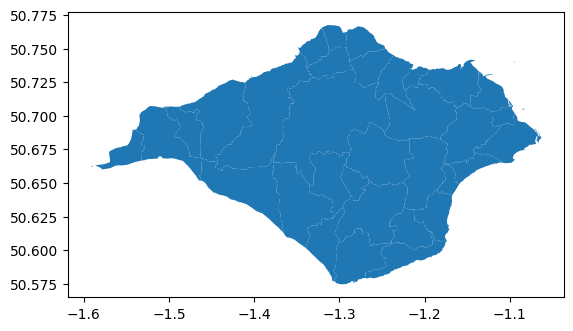

In [ ]:
# gdf of Parishes in Isle of Wight
gpd_parishes_iw = gpd.sjoin(parish_gdf, boundary_gdf, how="inner", predicate="intersects")
gpd_parishes_iw.to_file("iw_parishes.gpkg", driver="GPKG")
gpd_parishes_iw.plot()

In [111]:
gpd_parishes_iw.to_file("iw_parishes.geojson", driver="GeoJSON")

In [96]:
# Ancient woodland
# https://www.planning.data.gov.uk/dataset/ancient-woodland#
# url = "https://files.planning.data.gov.uk/dataset/ancient-woodland.geojson"
woodland_gdf = gpd.read_file("ancient-woodland.geojson")
woodland_gdf = gpd.sjoin(woodland_gdf, boundary_gdf, how="inner", predicate="intersects")
woodland_gdf.to_file("iw_woodland.gpkg", driver="GPKG")